# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library
### To keep the same dataset that I created skip these commands until you come to the line that says to Begin Here...

In [2]:
# This code is provided
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Save config information
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

In [4]:
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto natales
Processing Record 2 of Set 1 | morehead city
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | novonikolayevskiy
Processing Record 5 of Set 1 | bargara
City not found. Skipping...
Processing Record 6 of Set 1 | hengchun
Processing Record 7 of Set 1 | grytviken
Processing Record 8 of Set 1 | glace bay
Processing Record 9 of Set 1 | trincomalee
Processing Record 10 of Set 1 | taiohae
City not found. Skipping...
Processing Record 11 of Set 1 | lagos
Processing Record 12 of Set 1 | kirakira
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | santa cruz
Processing Record 15 of Set 1 | newman
Processing Record 16 of Set 1 | lihue
Processing Record 17 of Set 1 | lauro de freitas
Processing Record 18 of Set 1 | infantes
Processing Record 19 of Set 1 | polyarnyy
Processing Record 20 of Set 1 | linqu
Processing Record 21 of Set 1 | masumbwe
Processi

In [5]:
city_data

[{'City': 'puerto natales',
  'Lat': -51.7236,
  'Lng': -72.4875,
  'Max Temp': 3.38,
  'Humidity': 96,
  'Cloudiness': 100,
  'Wind Speed': 2.68,
  'Country': 'CL',
  'Date': 1725675954},
 {'City': 'morehead city',
  'Lat': 34.7229,
  'Lng': -76.726,
  'Max Temp': 24.44,
  'Humidity': 86,
  'Cloudiness': 0,
  'Wind Speed': 2.24,
  'Country': 'US',
  'Date': 1725675954},
 {'City': 'adamstown',
  'Lat': -25.066,
  'Lng': -130.1015,
  'Max Temp': 18.33,
  'Humidity': 78,
  'Cloudiness': 100,
  'Wind Speed': 10.32,
  'Country': 'PN',
  'Date': 1725675954},
 {'City': 'novonikolayevskiy',
  'Lat': 50.9738,
  'Lng': 42.3649,
  'Max Temp': 10.67,
  'Humidity': 53,
  'Cloudiness': 0,
  'Wind Speed': 1.75,
  'Country': 'RU',
  'Date': 1725675954},
 {'City': 'hengchun',
  'Lat': 22.0042,
  'Lng': 120.7439,
  'Max Temp': 27.35,
  'Humidity': 82,
  'Cloudiness': 100,
  'Wind Speed': 4.52,
  'Country': 'TW',
  'Date': 1725675955},
 {'City': 'grytviken',
  'Lat': -54.2811,
  'Lng': -36.5092,
  'Max 

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,3.38,96,100,2.68,CL,1725675954
1,morehead city,34.7229,-76.7260,24.44,86,0,2.24,US,1725675954
2,adamstown,-25.0660,-130.1015,18.33,78,100,10.32,PN,1725675954
3,novonikolayevskiy,50.9738,42.3649,10.67,53,0,1.75,RU,1725675954
4,hengchun,22.0042,120.7439,27.35,82,100,4.52,TW,1725675955


In [8]:
# # Convert datetime to readable date format
city_data_df['Date']=(pd.to_datetime(city_data_df['Date'],unit='s')).dt.date
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,3.38,96,100,2.68,CL,2024-09-07
1,morehead city,34.7229,-76.7260,24.44,86,0,2.24,US,2024-09-07
2,adamstown,-25.0660,-130.1015,18.33,78,100,10.32,PN,2024-09-07
3,novonikolayevskiy,50.9738,42.3649,10.67,53,0,1.75,RU,2024-09-07
4,hengchun,22.0042,120.7439,27.35,82,100,4.52,TW,2024-09-07


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

### BEGIN HERE To recreate the plots begin running code here after importing Dependecies

In [5]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,3.38,96,100,2.68,CL,2024-09-07
1,morehead city,34.7229,-76.7260,24.44,86,0,2.24,US,2024-09-07
2,adamstown,-25.0660,-130.1015,18.33,78,100,10.32,PN,2024-09-07
3,novonikolayevskiy,50.9738,42.3649,10.67,53,0,1.75,RU,2024-09-07
4,hengchun,22.0042,120.7439,27.35,82,100,4.52,TW,2024-09-07


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

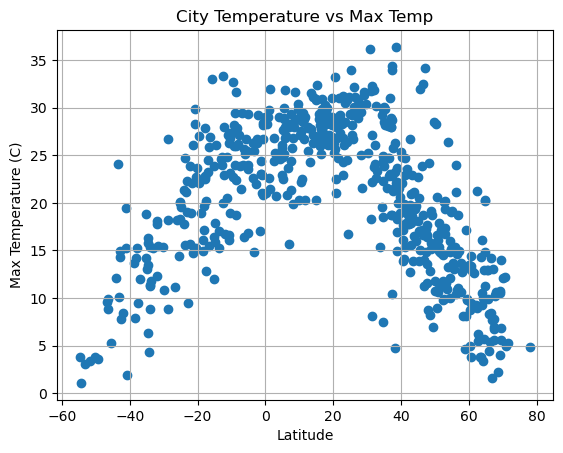

In [6]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Temperature vs Max Temp")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

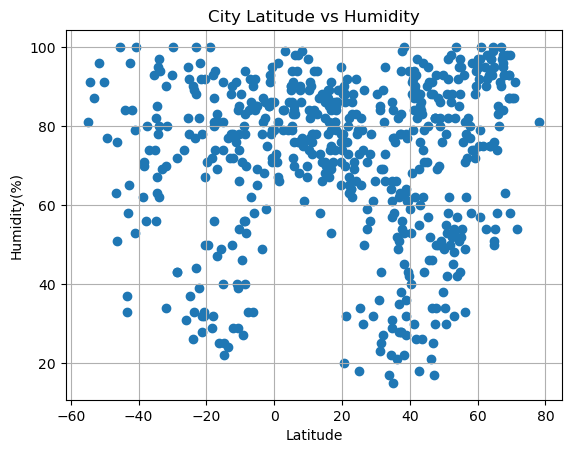

In [7]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

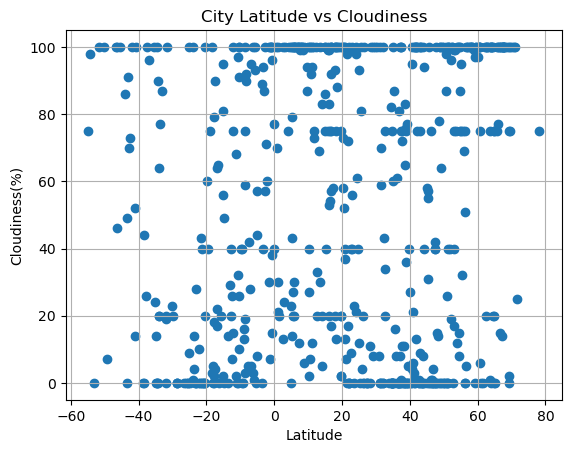

In [8]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

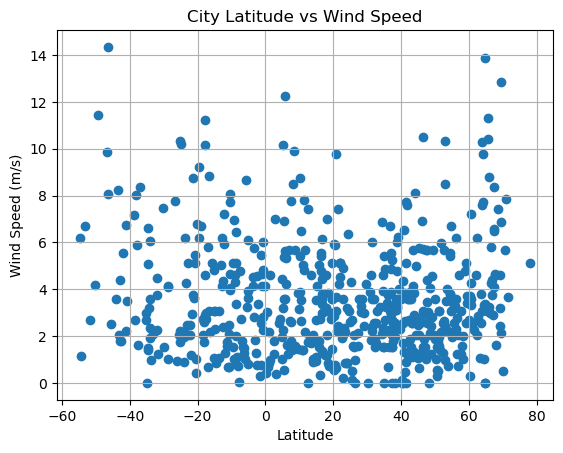

In [9]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [10]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,morehead city,34.7229,-76.7260,24.44,86,0,2.24,US,2024-09-07
3,novonikolayevskiy,50.9738,42.3649,10.67,53,0,1.75,RU,2024-09-07
4,hengchun,22.0042,120.7439,27.35,82,100,4.52,TW,2024-09-07
6,glace bay,46.1969,-59.9570,17.16,88,75,1.34,CA,2024-09-07
7,trincomalee,8.5711,81.2335,27.99,75,99,9.91,LK,2024-09-07


In [11]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,3.38,96,100,2.68,CL,2024-09-07
2,adamstown,-25.0660,-130.1015,18.33,78,100,10.32,PN,2024-09-07
5,grytviken,-54.2811,-36.5092,1.09,91,98,1.15,GS,2024-09-07
9,kirakira,-10.4544,161.9205,27.10,66,100,8.07,SB,2024-09-07
10,waitangi,-43.9535,-176.5597,12.12,84,86,3.58,NZ,2024-09-07


In [12]:
###  Temperature vs. Latitude Linear Regression Plot

Linear regression on Northern Hemisphere

The r-value is: 0.5898159553700391


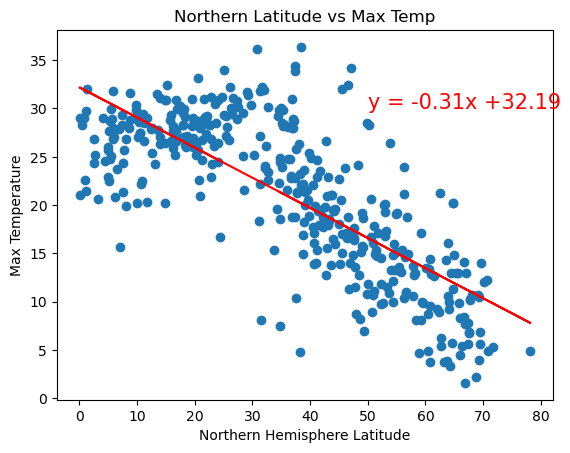

In [13]:
# Create x and y values for Northern Hemishphere
x_values_nh = northern_hemi_df['Lat']
y_values_nh = northern_hemi_df['Max Temp']

# Perform a linear regression on Max Temp vs. Northern Hemisphere latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_nh, y_values_nh)

# Get regression values
regress_values_nh = x_values_nh * slope + intercept

# Create line equation string
line_eq_nh = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values_nh,y_values_nh)
plt.plot(x_values_nh,regress_values_nh,"r-")

# Label plot and annotate the line equation
plt.title("Northern Latitude vs Max Temp")
plt.xlabel('Northern Hemisphere Latitude')
plt.ylabel('Max Temperature')
plt.annotate(line_eq_nh,(50,30),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

Linear regression on Southern Hemisphere

The r-value is: 0.5736325154348209


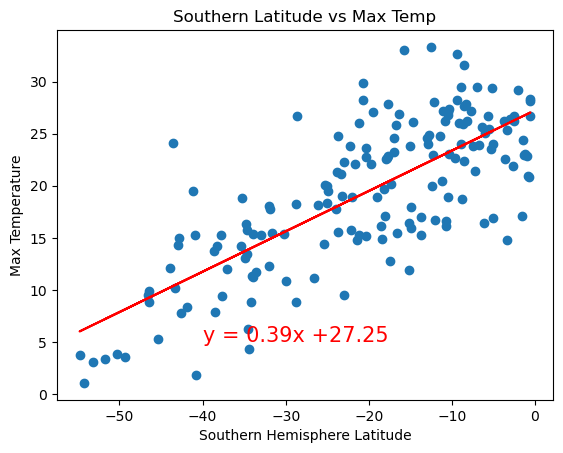

In [14]:
# Create x and y values for Southern Hemishphere
x_values_sh = southern_hemi_df['Lat']
y_values_sh = southern_hemi_df['Max Temp']

# Perform a linear regression on Max Temp vs. Southern Hemisphere latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_sh, y_values_sh)

# Get regression values
regress_values = x_values_sh * slope + intercept

# Create line equation string
line_eq_sh = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values_sh,y_values_sh)
plt.plot(x_values_sh,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Southern Latitude vs Max Temp")
plt.xlabel('Southern Hemisphere Latitude')
plt.ylabel('Max Temperature')
plt.annotate(line_eq_sh,(-40,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

###  Temperature vs. Latitude Linear Regression Plot
**Discussion about the linear relationship:**<br/>
 - In the Northern Hemisphere there is a negative linear relationship with an r-value of 0.58 - meaning that the further from the equator the lower the Max Temps is.
 - In the Southern Hemisphere the opposite is true - there is a positive linear relationship and an r-value of 0.57 - meaning that the closer to the equator the greater the Max Temp is.


### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0012134349936101985


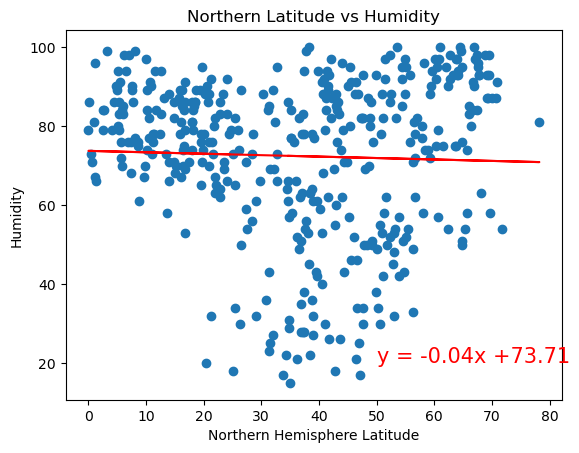

In [16]:
# Northern Hemisphere
# Create x and y values for Northern Hemishphere
x_values_nh = northern_hemi_df['Lat']
y_values_nh = northern_hemi_df['Humidity']

# Perform a linear regression on Max Temp vs. Northern Hemisphere latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_nh, y_values_nh)

# Get regression values
regress_values_nh = x_values_nh * slope + intercept

# Create line equation string
line_eq_nh = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values_nh,y_values_nh)
plt.plot(x_values_nh,regress_values_nh,"r-")

# Label plot and annotate the line equation
plt.title("Northern Latitude vs Humidity")
plt.xlabel('Northern Hemisphere Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq_nh,(50,20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.0036594230832145123


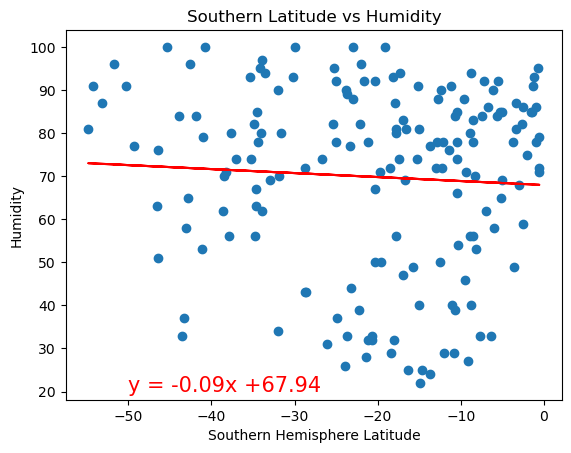

In [17]:
# Southern Hemisphere
# Create x and y values for Southern Hemishphere
x_values_sh = southern_hemi_df['Lat']
y_values_sh = southern_hemi_df['Humidity']

# Perform a linear regression on Max Temp vs. Southern Hemisphere latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_sh, y_values_sh)

# Get regression values
regress_values = x_values_sh * slope + intercept

# Create line equation string
line_eq_sh = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values_sh,y_values_sh)
plt.plot(x_values_sh,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Southern Latitude vs Humidity")
plt.xlabel('Southern Hemisphere Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq_sh,(-50,20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

### Humidity vs. Latitude Linear Regression Plot
**Discussion about the linear relationship:**<br/>
 - In both the Northern and Southern Hemispheres the linear regression line is almost horizontal (although it is negative) and with an r-value bwetween 0.001 and 0.003 - meaning that the relationship between Latitude and Humidity is very weak as there is almost no relationship between Humidity and Latitude.


### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 3.887965791456354e-05


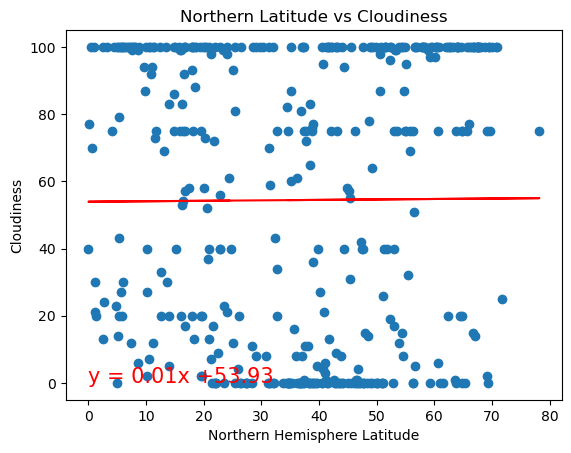

In [18]:
# Northern Hemisphere
# Create x and y values for Northern Hemishphere
x_values_nh = northern_hemi_df['Lat']
y_values_nh = northern_hemi_df['Cloudiness']

# Perform a linear regression on Max Temp vs. Northern Hemisphere latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_nh, y_values_nh)

# Get regression values
regress_values_nh = x_values_nh * slope + intercept

# Create line equation string
line_eq_nh = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values_nh,y_values_nh)
plt.plot(x_values_nh,regress_values_nh,"r-")

# Label plot and annotate the line equation
plt.title("Northern Latitude vs Cloudiness")
plt.xlabel('Northern Hemisphere Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq_nh,(0,0),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.0001597472918406383


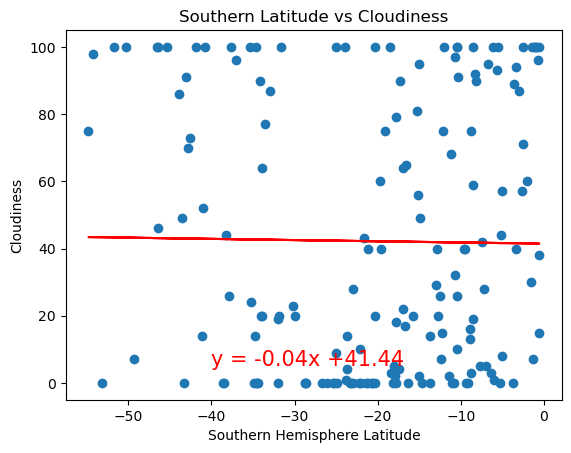

In [19]:
# Southern Hemisphere
# Create x and y values for Southern Hemishphere
x_values_sh = southern_hemi_df['Lat']
y_values_sh = southern_hemi_df['Cloudiness']

# Perform a linear regression on Max Temp vs. Southern Hemisphere latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_sh, y_values_sh)

# Get regression values
regress_values = x_values_sh * slope + intercept

# Create line equation string
line_eq_sh = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values_sh,y_values_sh)
plt.plot(x_values_sh,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Southern Latitude vs Cloudiness")
plt.xlabel('Southern Hemisphere Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq_sh,(-40,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

### Cloudiness vs. Latitude Linear Regression Plot
**Discussion about the linear relationship:**<br/>
- Similar to the results from Humidity and Latitude, both the Nothern and Southern Hemispheres the linear regression line and R-values show no relationship between Cloudiness and Latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.011688628500160142


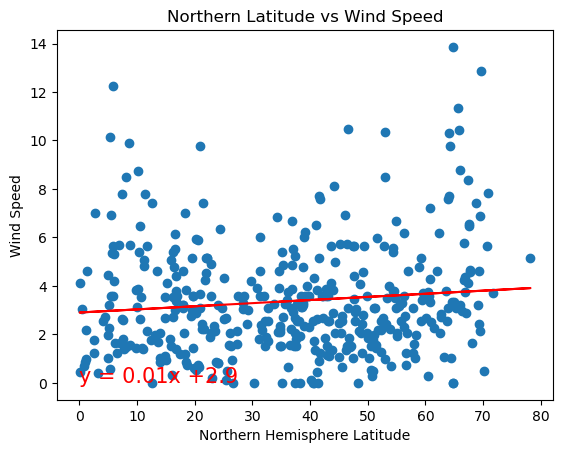

In [23]:
# Northern Hemisphere
# Create x and y values for Northern Hemishphere
x_values_nh = northern_hemi_df['Lat']
y_values_nh = northern_hemi_df['Wind Speed']

# Perform a linear regression on Max Temp vs. Northern Hemisphere latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_nh, y_values_nh)

# Get regression values
regress_values_nh = x_values_nh * slope + intercept

# Create line equation string
line_eq_nh = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values_nh,y_values_nh)
plt.plot(x_values_nh,regress_values_nh,"r-")

# Label plot and annotate the line equation
plt.title("Northern Latitude vs Wind Speed")
plt.xlabel('Northern Hemisphere Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq_nh,(0,0),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.04019505309827347


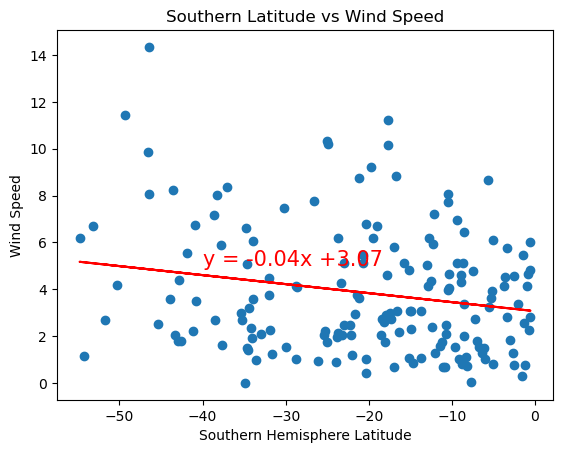

In [24]:
# Southern Hemisphere
# Create x and y values for Southern Hemishphere
x_values_sh = southern_hemi_df['Lat']
y_values_sh = southern_hemi_df['Wind Speed']

# Perform a linear regression on Max Temp vs. Southern Hemisphere latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_sh, y_values_sh)

# Get regression values
regress_values = x_values_sh * slope + intercept

# Create line equation string
line_eq_sh = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values_sh,y_values_sh)
plt.plot(x_values_sh,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Southern Latitude vs Wind Speed")
plt.xlabel('Southern Hemisphere Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq_sh,(-40,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

### Wind Speed vs. Latitude Linear Regression Plot
**Discussion about the linear relationship:**<br/>
 - In both the Northern and Southern Hemispheres the linear regression line is almost horizontal.  The Northern Hemisphere is at a negative slope and the Southern Hemisphere is at a positive slope.  However, with r-values between 0.011 and 0.04 there may be a small correlation between Wind Speed and Latitude - especially in the Southern Hemisphere - but additional information should be gathered before making this correlation.